In [1]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [2]:
#This is to display whole of the dataframe
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [3]:
#Loading the Data
df = pd.read_csv('car-mpg.csv')
df = df.sample(frac = 1,random_state = 3)
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
358,31.6,4,120.0,74,2635,18.3,81,3,mazda 626
16,18.0,6,199.0,97,2774,15.5,70,1,amc hornet
292,18.5,8,360.0,150,3940,13.0,79,1,chrysler lebaron town @ country (sw)
81,28.0,4,97.0,92,2288,17.0,72,3,datsun 510 (sw)
112,19.0,4,122.0,85,2310,18.5,73,1,ford pinto


In [4]:
#Finding the unqiue values
df.hp.unique()

#here we see there is '?' here.

array(['74', '97', '150', '92', '85', '80', '110', '132', '145', '46',
       '170', '100', '152', '72', '70', '68', '75', '120', '95', '153',
       '86', '108', '90', '140', '82', '76', '64', '138', '88', '129',
       '230', '52', '?', '84', '210', '60', '122', '130', '96', '78',
       '65', '66', '81', '112', '67', '113', '58', '180', '48', '54',
       '165', '198', '69', '115', '105', '148', '215', '208', '98', '63',
       '139', '83', '190', '155', '71', '220', '79', '87', '135', '77',
       '125', '53', '116', '175', '89', '225', '160', '102', '137', '61',
       '62', '142', '158', '167', '149', '49', '107', '103', '193', '94',
       '93', '200', '91', '133'], dtype=object)

In [5]:
#To check the shape of Dataframe
df.shape

(398, 9)

In [6]:
#To check the data-type of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 358 to 362
Data columns (total 9 columns):
mpg         398 non-null float64
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
origin      398 non-null int64
car_name    398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 31.1+ KB


# Checking Missing Values

In [7]:
df.isna().sum()

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car_name    0
dtype: int64

No missing Values

# Cleaning Data
#hp

# Removing ? from hp and converting its data type to INT

In [8]:
df['hp'] = df['hp'].replace('?',np.nan)

In [9]:
df['hp'] = df['hp'].astype(float)

In [10]:
df['hp'] = df['hp'].replace(np.nan,df['hp'].mean())

In [11]:
df['hp'] = df['hp'].astype(int)

# Check for Outliers

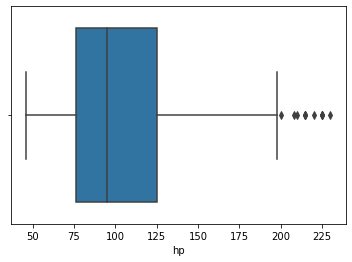

In [12]:
sns.boxplot(df.hp)


We see there are outliers in hp

In [13]:
Q1 = df['hp'].quantile(0.25)
Q3 = df['hp'].quantile(0.75)
IQR = Q3-Q1
IQR

upper = Q3 + 1.5*IQR
print(upper)

c_df = df[df['hp']<upper]

198.5


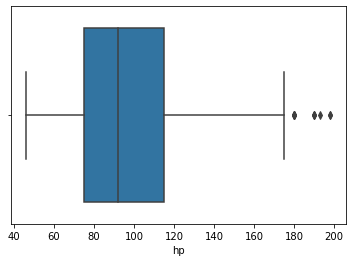

In [14]:
sns.boxplot(c_df.hp)

# Building Statistical Model

In [15]:
import statsmodels.api as sm

In [16]:
c_df = c_df.drop('car_name',axis = 1)

In [17]:
y = c_df['mpg']
X = c_df.drop('mpg',axis = 1)
Xc = sm.add_constant(X)

C:\Users\Avish\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [19]:
pd.DataFrame([vif(Xc.values,i) for i in range(Xc.shape[1])],index = Xc.columns,columns=['VIF'])

,VIF
const,748.795215
cyl,11.737632
disp,24.050919
hp,9.798302
wt,12.494324
acc,2.643679
yr,1.181244
origin,1.735350


In [20]:
model = sm.OLS(y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     239.7
Date:                Fri, 20 Mar 2020   Prob (F-statistic):          5.68e-135
Time:                        13:23:55   Log-Likelihood:                -1011.2
No. Observations:                 387   AIC:                             2038.
Df Residuals:                     379   BIC:                             2070.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -16.9747      4.639     -3.659      0.000     -26.095      -7.854
cyl           -0.2039      0.348     -0.585      0.559      -0.889       0.481
disp           0.0168      0.008      1.989      0.047       0.000       0.033
hp            -0.0277      0.016     -1.750      0.081      -0.059       0.003
wt            -0.0065      0.001     -8.919      0.000      -0.008      -0.005
acc            0.0523      0.103      0.506      0.613      -0.151       0.256
yr             0.7567      0.051     14.945      0.000       0.657       0.856
origin         1.3921      0.277      5.027      0.000       0.848       1.937
==============================================================================
Omnibus:                       30.261   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.378
Skew:                           0.540   Prob(JB):                     8.50e-11
Kurtosis:                       4.308   Cond. No.                     8.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Here we see that 'cyl' & 'hp' & 'acc' are features that is not significant.

In [21]:
#Drop cyl,hp,acc
Xc = Xc.drop(['cyl','hp','acc'],axis = 1)
model = sm.OLS(y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     411.8
Date:                Fri, 20 Mar 2020   Prob (F-statistic):          4.69e-137
Time:                        13:23:55   Log-Likelihood:                -1015.4
No. Observations:                 387   AIC:                             2041.
Df Residuals:                     382   BIC:                             2061.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -18.7113      4.021     -4.653      0.000     -26.618     -10.804
disp           0.0059      0.005      1.110      0.268      -0.005       0.016
wt            -0.0068      0.001    -11.310      0.000      -0.008      -0.006
yr             0.7810      0.050     15.643      0.000       0.683       0.879
origin         1.1846      0.268      4.418      0.000       0.657       1.712
==============================================================================
Omnibus:                       37.154   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.138
Skew:                           0.574   Prob(JB):                     1.60e-15
Kurtosis:                       4.705   Cond. No.                     7.19e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Test of Assumptions

# 1.Normality of Residuals

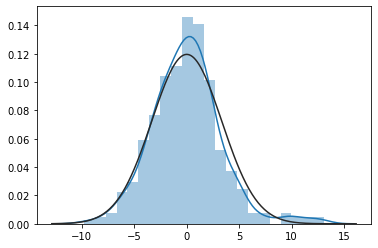

In [22]:
from scipy.stats import norm
norm.fit(model.resid)
sns.distplot(model.resid,fit = norm)

Almost normal

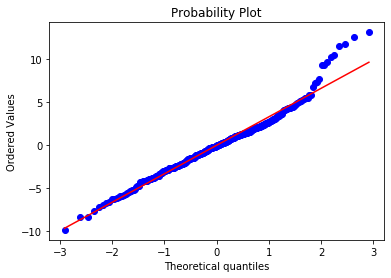

In [23]:
import scipy.stats as st
st.probplot(model.resid,plot = plt)
plt.show()

In [24]:
#Jarque Bera Test to check normality
st.jarque_bera(model.resid)

(68.13803511984695, 1.5543122344752192e-15)

pvalue very close to zero so reject Ho ,so JB test indicate that residual are not normal.

In [25]:
#Applying Transformation
ly = np.log(y)

In [26]:
model = sm.OLS(ly,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     630.1
Date:                Fri, 20 Mar 2020   Prob (F-statistic):          1.02e-166
Time:                        13:23:57   Log-Likelihood:                 273.91
No. Observations:                 387   AIC:                            -537.8
Df Residuals:                     382   BIC:                            -518.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5812      0.144     11.001      0.000       1.299       1.864
disp          -0.0002      0.000     -0.874      0.383      -0.001       0.000
wt            -0.0003   2.15e-05    -12.934      0.000      -0.000      -0.000
yr             0.0307      0.002     17.200      0.000       0.027       0.034
origin         0.0279      0.010      2.908      0.004       0.009       0.047
==============================================================================
Omnibus:                       11.035   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               18.689
Skew:                          -0.146   Prob(JB):                     8.74e-05
Kurtosis:                       4.036   Cond. No.                     7.19e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
#Ho: Data is normal
#H1: Data is not normal

#Jarque-Bera test
st.jarque_bera(model.resid)

(18.689121962915983, 8.743971430236197e-05)

p-value again closed to zero, so reject Ho. Hence Residuals are not normal

# 2. Test Homoscedasticity

Text(0, 0.5, 'residuals')

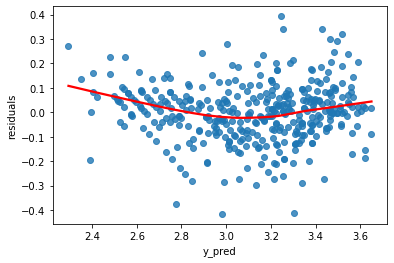

In [28]:
y_pred = model.predict(Xc)
resids = model.resid

sns.regplot(x = y_pred, y = resids,lowess=True,line_kws={'color':'red'})
plt.xlabel('y_pred')
plt.ylabel('residuals')

In [29]:
#Goldfeld Test for Checking Homoscedasticity

import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['F-Stastistics','p-value']
test = sms.het_goldfeldquandt(model.resid,model.model.exog)
print(lzip(name,test))

[('F-Stastistics', 1.3081550705778353), ('p-value', 0.03294726389096014)]


# 3.Test of Autocorrelation

In [30]:
y = df['mpg']
X = df.drop('mpg',axis = 1)
Xc = sm.add_constant(X)

C:\Users\Avish\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


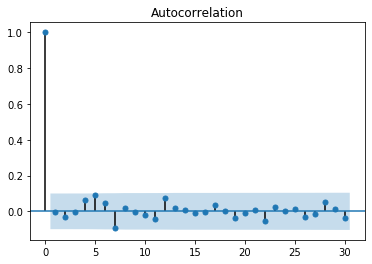

In [32]:
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(model.resid,lags = 30)
acf.show()

# 4. Test of Linearity

In [33]:
y = df['mpg']
X = df.drop('mpg',axis = 1)
Xc = sm.add_constant(X)

In [35]:
import statsmodels.api as sm

Text(0, 0.5, 'residuals')

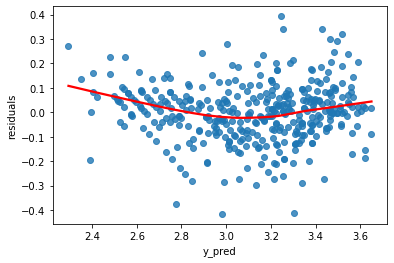

In [37]:
sns.regplot(x = y_pred, y = resids,lowess=True,line_kws={'color':'red'})
plt.xlabel('y_pred')
plt.ylabel('residuals')

# Rainbow Test for Linearity of Residuals


In [38]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(res = model,frac=0.5)

(1.133286681540497, 0.1943297197887019)

Ho: residuals exhibit linearity
H1: residuals exhibit non-linearity
Based on the test we can conclude that residuals exhibhit linearity.

# Feature Elimination

# Recursive Feature Elimination(RFE)

In [43]:
y = c_df['mpg']
X = c_df.drop('mpg',axis = 1)

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error

In [45]:
lr = LinearRegression()
rfe = RFE(lr,n_features_to_select = 8 )
rfe.fit(X,y)

#WE ASKED ALGORITHM TO TELL US WHICH FEATURE IS WORSE BY PUTTING 'n_features_to_select = 8

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=8, step=1, verbose=0)

In [46]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True])

In [47]:
pd.DataFrame(rfe.ranking_,index = X.columns, columns=['Select'])

,Select
cyl,1
disp,1
hp,1
wt,1
acc,1
yr,1
origin,1


This will give 8 best features with rank 1 and rest features with subsequent ranks.

In [48]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)

In [49]:
no_of_cols = X_train.shape[1]
r2score = []
rmse = []

lr = LinearRegression()  #estimator
for i in range(no_of_cols):
    rfe = RFE(lr,n_features_to_select=i+1)
    rfe.fit(X_train,y_train)
    y_test_pred = rfe.predict(X_test)
    
    #for r2score
    r2 = r2_score(y_test,y_test_pred)
    r2score.append(r2)
    
    #for rmse
    rms = np.sqrt(mean_squared_error(y_test,y_test_pred))
    rmse.append(rms)
    
    

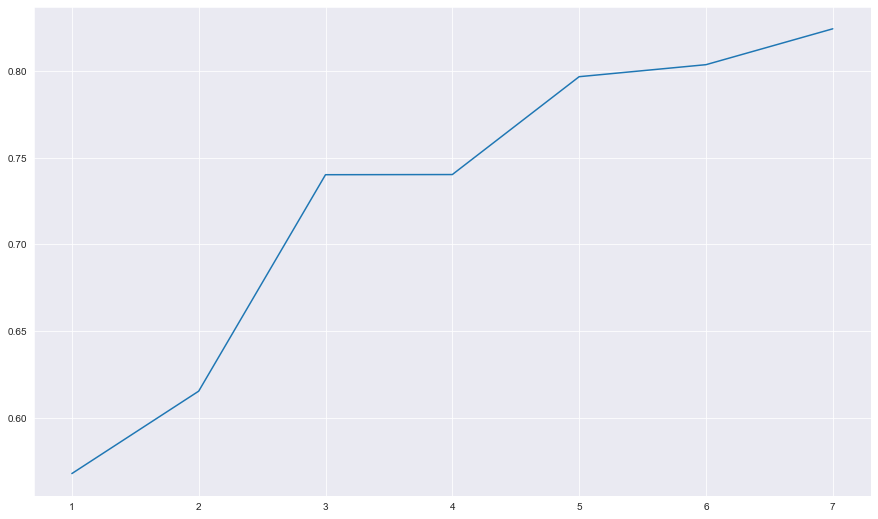

In [50]:
plt.plot(range(1,8),r2score)

In [51]:
r2score

[0.5677941618268199,
 0.6153241497544213,
 0.7401634144291,
 0.7402610799200587,
 0.796700689017784,
 0.8036288278945516,
 0.8243252534093657]

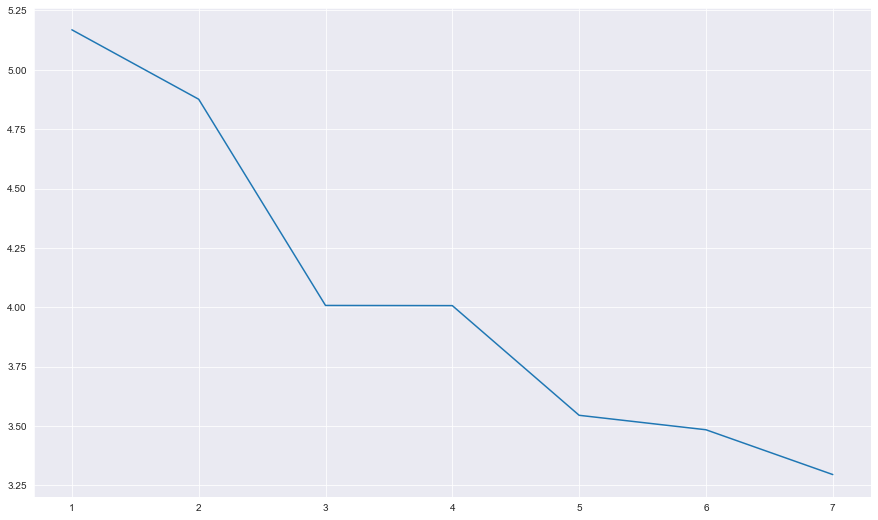

In [52]:
plt.plot(range(1,8),rmse)

In [53]:
rmse

[5.168471410078129,
 4.876006377477098,
 4.0074393113633535,
 4.0066860969690925,
 3.544743029350887,
 3.4838196945826763,
 3.295121794581949]

# Hyperparamtere Tuning to find the optimal number of features to keep

In [54]:
from sklearn.model_selection import KFold,GridSearchCV

params = {'n_features_to_select': list(range(1,8))}
lr = LinearRegression()
rfe = RFE(lr)

kf = KFold(n_splits=3,random_state=3)

gsearch = GridSearchCV(rfe,param_grid=params,scoring='r2',cv = kf,return_train_score=True)
gsearch.fit(X,y)

C:\Users\Avish\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


GridSearchCV(cv=KFold(n_splits=3, random_state=3, shuffle=False),
             error_score=nan,
             estimator=RFE(estimator=LinearRegression(copy_X=True,
                                                      fit_intercept=True,
                                                      n_jobs=None,
                                                      normalize=False),
                           n_features_to_select=None, step=1, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'n_features_to_select': [1, 2, 3, 4, 5, 6, 7]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=0)

In [55]:
gsearch.best_params_  #we found that hyperparameter tuning its telling us to  keep 7 features.

{'n_features_to_select': 7}

In [56]:
pd.DataFrame(gsearch.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.006318,4.713705e-04,0.000997,2.247832e-07,1,{'n_features_to_select': 1},0.629961,0.528002,0.543494,0.567153,0.044861,7,0.547141,0.597118,0.599375,0.581211,0.024109
1,0.004987,1.123916e-07,0.000997,1.123916e-07,2,{'n_features_to_select': 2},0.654136,0.532348,0.583557,0.590013,0.049929,6,0.573583,0.631849,0.615612,0.607015,0.024552
2,0.004322,4.705837e-04,0.000997,5.947204e-07,3,{'n_features_to_select': 3},0.740114,0.679724,0.700330,0.706723,0.025065,5,0.703428,0.734939,0.730954,0.723107,0.014010
3,0.004322,4.701341e-04,0.000997,1.946680e-07,4,{'n_features_to_select': 4},0.740271,0.679937,0.700564,0.706924,0.025039,4,0.703623,0.734995,0.730994,0.723204,0.013942
4,0.003325,4.699655e-04,0.000997,4.495664e-07,5,{'n_features_to_select': 5},0.769367,0.713009,0.742966,0.741781,0.023023,3,0.771053,0.761193,0.786146,0.772797,0.010261
5,0.002992,2.247832e-07,0.000997,1.123916e-07,6,{'n_features_to_select': 6},0.775868,0.790319,0.749598,0.771928,0.016856,2,0.772222,0.821296,0.789059,0.794192,0.020360
6,0.001994,2.973602e-07,0.001330,4.702465e-04,7,{'n_features_to_select': 7},0.812089,0.787531,0.803227,0.800949,0.010155,1,0.813285,0.821375,0.819866,0.818176,0.003512


# Forward selection to decide the best number of features to keep in the model(Step Forward Selection)

In [57]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [58]:
lr = LinearRegression()
sfs1 = sfs(lr,k_features = 7,scoring = 'r2',cv = 3,verbose = 2)
sfs1.fit(X,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2020-03-20 13:34:55] Features: 1/7 -- score: 0.674676419825564[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2020-03-20 13:34:55] Features: 2/7 -- score: 0.7983050072830365[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished

[2020-03-20 13:34:56] Features: 3/7 -- score: 0.8054206252921238[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 o

SequentialFeatureSelector(clone_estimator=True, cv=3,
                          estimator=LinearRegression(copy_X=True,
                                                     fit_intercept=True,
                                                     n_jobs=None,
                                                     normalize=False),
                          fixed_features=None, floating=False, forward=True,
                          k_features=7, n_jobs=1, pre_dispatch='2*n_jobs',
                          scoring='r2', verbose=2)

In [59]:
sf = pd.DataFrame(sfs1.subsets_).T
sf

,feature_idx,cv_scores,avg_score,feature_names
1,"(3,)","[0.6935447775629311, 0.6580515929623366, 0.672...",0.674676,"(wt,)"
2,"(3, 5)","[0.8222837857449261, 0.7870157120569722, 0.785...",0.798305,"(wt, yr)"
3,"(3, 5, 6)","[0.8295672070713475, 0.7868035726500173, 0.799...",0.805421,"(wt, yr, origin)"
4,"(3, 4, 5, 6)","[0.8288466833922814, 0.7887956911240924, 0.800...",0.805907,"(wt, acc, yr, origin)"
5,"(0, 3, 4, 5, 6)","[0.8270457631948078, 0.7895743150958967, 0.800...",0.805769,"(cyl, wt, acc, yr, origin)"
6,"(0, 1, 3, 4, 5, 6)","[0.8210753646365103, 0.7903193643415838, 0.802...",0.80467,"(cyl, disp, wt, acc, yr, origin)"
7,"(0, 1, 2, 3, 4, 5, 6)","[0.8120892839509759, 0.7875307378913221, 0.803...",0.800949,"(cyl, disp, hp, wt, acc, yr, origin)"


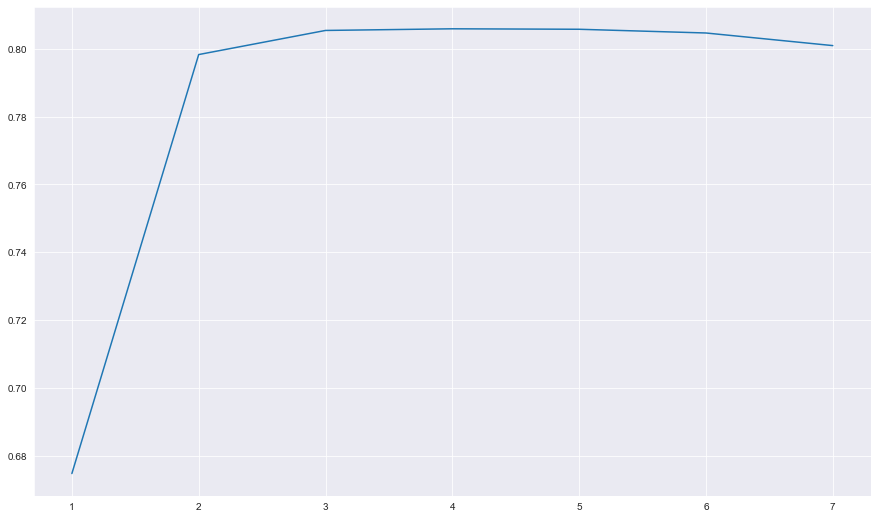

In [60]:
plt.plot(sf['avg_score'])

In [61]:
cols = list(sfs1.k_feature_names_)
cols

['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin']

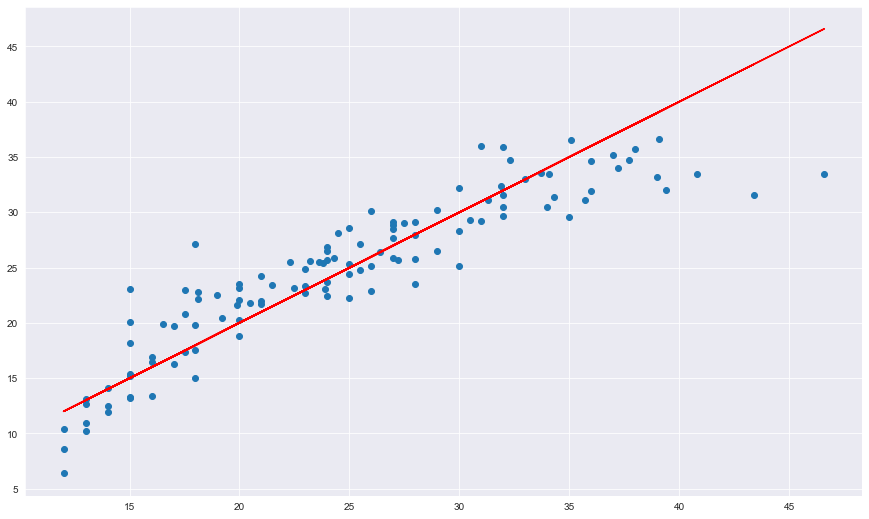

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X[cols], y, test_size=0.3, random_state=3)

lr.fit(X_train, y_train)
y_test_pred = lr.predict(X_test)

plt.scatter(y_test, y_test_pred)
plt.plot(y_test, y_test,'r')

# Building Linear Regression Model

In [63]:
y = c_df['mpg']
X = c_df.drop('mpg',axis = 1)

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)

In [65]:
print(X_train.shape,X_test.shape)

(270, 7) (117, 7)


In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

lr = LinearRegression()
lr.fit(X_train,y_train)


y_test_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)
print('r-square for train: ', r2_score(y_train,y_train_pred))
print('RMSE for train: ',np.sqrt(mean_squared_error(y_train,y_train_pred)))

print('\n')
print('r-square for test: ', r2_score(y_test,y_test_pred))
print('RMSE for test: ', np.sqrt(mean_squared_error(y_test,y_test_pred)))

NameError: name 'X_train' is not defined

# Regularization Techniques

# 1.Lasso

In [67]:
from sklearn.linear_model import Lasso,LassoCV

In [68]:
alphas = np.linspace(0.0001,1,100)
lasso_cv = LassoCV(alphas = alphas,cv = 3,random_state=3)
lasso_cv.fit(X,y)
lasso_cv

LassoCV(alphas=array([1.000e-04, 1.020e-02, 2.030e-02, 3.040e-02, 4.050e-02, 5.060e-02,
       6.070e-02, 7.080e-02, 8.090e-02, 9.100e-02, 1.011e-01, 1.112e-01,
       1.213e-01, 1.314e-01, 1.415e-01, 1.516e-01, 1.617e-01, 1.718e-01,
       1.819e-01, 1.920e-01, 2.021e-01, 2.122e-01, 2.223e-01, 2.324e-01,
       2.425e-01, 2.526e-01, 2.627e-01, 2.728e-01, 2.829e-01, 2.930e-01,
       3.031e-01, 3.132e-01, 3.233e-0...
       8.485e-01, 8.586e-01, 8.687e-01, 8.788e-01, 8.889e-01, 8.990e-01,
       9.091e-01, 9.192e-01, 9.293e-01, 9.394e-01, 9.495e-01, 9.596e-01,
       9.697e-01, 9.798e-01, 9.899e-01, 1.000e+00]),
        copy_X=True, cv=3, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=3, selection='cyclic', tol=0.0001,
        verbose=False)

In [69]:
lasso_cv.alpha_   #best alpha

0.0809

In [70]:
lasso = Lasso(alpha=lasso_cv.alpha_,random_state=3)

lasso.fit(X_train,y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print('r-square of Train: ',r2_score(y_train,y_train_pred))
print('r-square of Test: ',r2_score(y_test,y_test_pred))

r-square of Train:  0.8069823816869933
r-square of Test:  0.8257877565244663


In [71]:
lasso.coef_

array([-0.19457009,  0.01871009, -0.03201402, -0.00673211,  0.02357724,
        0.75522548,  1.02162065])

# 2.Ridge

In [72]:
from sklearn.linear_model import Ridge,RidgeCV

In [73]:
alphas = np.logspace(0,1,200)
ridge_cv = RidgeCV(alphas = alphas,scoring = 'r2',cv = 3)
ridge_cv.fit(X,y)
ridge_cv

RidgeCV(alphas=array([ 1.        ,  1.01163798,  1.0234114 ,  1.03532184,  1.0473709 ,
        1.05956018,  1.07189132,  1.08436597,  1.0969858 ,  1.1097525 ,
        1.12266777,  1.13573336,  1.148951  ,  1.16232247,  1.17584955,
        1.18953407,  1.20337784,  1.21738273,  1.2315506 ,  1.24588336,
        1.26038293,  1.27505124,  1.28989026,  1.30490198,  1.3200884 ,
        1.33545156,  1.35099352,  1.36671636,  1.38262217,  1.3987131 ,
        1.4149913 ,  1.431...
        7.57525026,  7.66341087,  7.75259749,  7.84282206,  7.93409667,
        8.02643352,  8.11984499,  8.21434358,  8.30994195,  8.40665289,
        8.50448934,  8.60346442,  8.70359136,  8.80488358,  8.90735464,
        9.01101825,  9.1158883 ,  9.22197882,  9.32930403,  9.43787828,
        9.54771611,  9.65883224,  9.77124154,  9.88495905, 10.        ]),
        cv=3, fit_intercept=True, gcv_mode=None, normalize=False, scoring='r2',
        store_cv_values=False)

In [74]:
ridge_cv.alpha_

10.0

# 3.Elastic Net

In [75]:
from sklearn.linear_model import ElasticNet,ElasticNetCV

In [76]:
alphas = np.logspace(-4,0,100)
en_cv = ElasticNetCV(alphas = alphas, cv = 3, random_state=3)
en_cv.fit(X,y)
en_cv

ElasticNetCV(alphas=array([1.00000000e-04, 1.09749877e-04, 1.20450354e-04, 1.32194115e-04,
       1.45082878e-04, 1.59228279e-04, 1.74752840e-04, 1.91791026e-04,
       2.10490414e-04, 2.31012970e-04, 2.53536449e-04, 2.78255940e-04,
       3.05385551e-04, 3.35160265e-04, 3.67837977e-04, 4.03701726e-04,
       4.43062146e-04, 4.86260158e-04, 5.33669923e-04, 5.85702082e-04,
       6.42807312e-04, 7.054802...
       3.59381366e-01, 3.94420606e-01, 4.32876128e-01, 4.75081016e-01,
       5.21400829e-01, 5.72236766e-01, 6.28029144e-01, 6.89261210e-01,
       7.56463328e-01, 8.30217568e-01, 9.11162756e-01, 1.00000000e+00]),
             copy_X=True, cv=3, eps=0.001, fit_intercept=True, l1_ratio=0.5,
             max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
             positive=False, precompute='auto', random_state=3,
             selection='cyclic', tol=0.0001, verbose=0)

In [77]:
en_cv.alpha_

0.08111308307896872